<a href="https://colab.research.google.com/github/dmsmiley/Digital_Humanities_Workshop/blob/main/Exodus_Sefaria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###0. Preprocessing to Get CSV

In [ ]:
import urllib.request, json, pandas as pd

In [ ]:
def get_normal_data(ch_st, ch_end):
    ch_end += 1
    data = []
    for x in range(ch_st, ch_end):
        with urllib.request.urlopen('https://www.sefaria.org/api/links/Exodus.{}'.format(x)) as url:
            y = json.loads(url.read().decode())
            data.append(y)
    
    dataset = []
    for x in data:
        for y in range(len(x)):
            dataset.append(x[y])
    
    return pd.json_normalize(dataset)

In [ ]:
data1 = get_normal_data(1,20)
data2 = get_normal_data(21,40)

In [ ]:
df = pd.concat([data1,data2])

In [ ]:
chapter = df['anchorRef'].str.split(' ', expand=True).rename(columns={0:'Book', 1:'Chapter'})
chapter = chapter['Chapter'].str.split(':', expand=True).rename(columns={0:'Chapter',1:'Verse'})
chapter = chapter.drop(columns=['Verse',2])

In [ ]:
df = pd.merge(df, chapter, left_index=True, right_index=True)

In [ ]:
df['Chapter'] = df['Chapter'].astype(int)

In [ ]:
df = df.rename(columns={"anchorVerse":"verse", 'Chapter':'chapter'})

In [ ]:
df = df[['_id','index_title', 'category', 'type', 'ref', 'anchorRef', 'Chapter', 'verse', 
         'compDate', 'he', 'text', 'heVersionTitle', 'collectiveTitle.he',
         'anchorRefExpanded', 'sourceRef','sourceHeRef', 'versionTitle', 'license',
         'versionTitleInHebrew', 'collectiveTitle.en', 'sourceHasEn', 'errorMargin',
         'commentaryNum','heTitle','heLicense','heVersionTitleInHebrew']]

In [ ]:
df.to_csv('exodus_links.csv', index=False)

###1. Prepping Data for Analysis

In [1]:
import pandas as pd

In [35]:
df = pd.read_csv('/content/drive/MyDrive/exodus_links.csv')

In [36]:
df.head()

,_id,index_title,category,type,ref,anchorRef,Chapter,verse,compDate,he,text,heVersionTitle,collectiveTitle.he,anchorRefExpanded,sourceRef,sourceHeRef,versionTitle,license,versionTitleInHebrew,collectiveTitle.en,sourceHasEn,errorMargin,commentaryNum,heTitle,heLicense,heVersionTitleInHebrew
0,515cfd7dedbab4483c99c98c,Shemot Rabbah,Midrash,midrash,Shemot Rabbah 1:1,Exodus 1:1,1,1,1200,וְאֵלֶּה שְׁמוֹת בְּנֵי יִשְׂרָאֵל הַבָּאִים מ...,And these are the names of the Sons of Israel ...,Midrash Rabbah -- TE,שמות רבה,['Exodus 1:1'],Shemot Rabbah 1:1,שמות רבה א׳:א׳,Sefaria Community Translation,CC0,תרגום קהילת ספאריה,Shemot Rabbah,True,0.0,1.0001,שמות רבה,unknown,מדרש רבה - תורת אמת
1,515cfd7dedbab4483c99c98c,Shemot Rabbah,Midrash,midrash,Shemot Rabbah 1:1,Exodus 1:1,21,1,1200,וְאֵלֶּה שְׁמוֹת בְּנֵי יִשְׂרָאֵל הַבָּאִים מ...,And these are the names of the Sons of Israel ...,Midrash Rabbah -- TE,שמות רבה,['Exodus 1:1'],Shemot Rabbah 1:1,שמות רבה א׳:א׳,Sefaria Community Translation,CC0,תרגום קהילת ספאריה,Shemot Rabbah,True,0.0,1.0001,שמות רבה,unknown,מדרש רבה - תורת אמת
2,51611ef7edbab4794f783097,Shemot Rabbah,Midrash,midrash,Shemot Rabbah 30:1,Exodus 21:1,1,1,1200,"וְאֵלֶּה הַמִּשְׁפָּטִים, הֲדָא הוּא דִכְתִיב ...",NaN,Midrash Rabbah -- TE,שמות רבה,['Exodus 21:1'],Shemot Rabbah 30:1,שמות רבה ל׳:א׳,Sefaria Community Translation,CC0,תרגום קהילת ספאריה,Shemot Rabbah,False,0.0,30.0001,שמות רבה,unknown,מדרש רבה - תורת אמת
3,51611ef7edbab4794f783097,Shemot Rabbah,Midrash,midrash,Shemot Rabbah 30:1,Exodus 21:1,21,1,1200,"וְאֵלֶּה הַמִּשְׁפָּטִים, הֲדָא הוּא דִכְתִיב ...",NaN,Midrash Rabbah -- TE,שמות רבה,['Exodus 21:1'],Shemot Rabbah 30:1,שמות רבה ל׳:א׳,Sefaria Community Translation,CC0,תרגום קהילת ספאריה,Shemot Rabbah,False,0.0,30.0001,שמות רבה,unknown,מדרש רבה - תורת אמת
4,515cfd94edbab4483c99c98e,Shemot Rabbah,Midrash,midrash,Shemot Rabbah 1:2,Exodus 1:1,1,1,1200,"דָּבָר אַחֵר, וְאֵלֶּה שְׁמוֹת, אָמַר רַבִּי א...","Furthermore: ""And these are the names..."" Rabb...",Midrash Rabbah -- TE,שמות רבה,['Exodus 1:1'],Shemot Rabbah 1:2,שמות רבה א׳:ב׳,Sefaria Community Translation,CC0,תרגום קהילת ספאריה,Shemot Rabbah,True,0.0,1.0002,שמות רבה,unknown,מדרש רבה - תורת אמת


In [30]:
df.describe()

,Chapter,verse,compDate,errorMargin,commentaryNum
count,160745.000000,160745.000000,156507.000000,156574.000000,160745.000000
mean,18.887822,15.150232,1338.805836,32.441523,38.129442
std,10.192897,10.495871,502.268291,64.298111,83.663606
min,1.000000,1.000000,-900.000000,0.000000,0.000000
25%,12.000000,7.000000,1110.000000,5.000000,6.000100
50%,20.000000,14.000000,1310.000000,15.000000,14.000800
75%,27.000000,22.000000,1795.000000,25.000000,29.000100
max,40.000000,340.000000,2018.000000,1000.000000,1147.000100


###2. EDA

In [12]:
import seaborn as sns

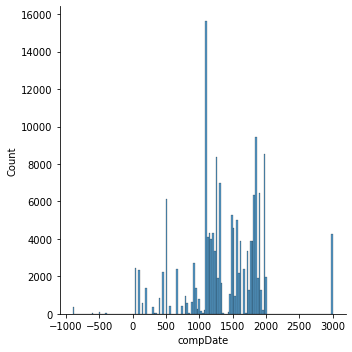

In [14]:
sns.displot(df['compDate'])

In [11]:
df.groupby(['anchorRef']).size().sort_values(ascending=False)[:15]

anchorRef
Exodus 15:1     880
Exodus 34:6     866
Exodus 12:2     826
Exodus 15:2     806
Exodus 27:20    700
Exodus 25:8     696
Exodus 25:2     598
Exodus 21:1     584
Exodus 24:7     576
Exodus 16:4     566
Exodus 23:19    562
Exodus 22:24    550
Exodus 15:17    538
Exodus 15:26    536
Exodus 21:2     522
dtype: int64

In [53]:
df.groupby(['index_title']).size().sort_values(ascending=False)[:15]

index_title
Midrash Lekach Tov         5961
Rashi on Exodus            3854
Birkat Asher on Torah      3443
Haamek Davar on Exodus     3432
Rabbeinu Bahya             3356
Torah Temimah on Torah     3342
Chizkuni                   3272
Ibn Ezra on Exodus         3196
Yalkut Shimoni on Torah    2923
Zohar                      2865
Or HaChaim on Exodus       2818
Shenei Luchot HaBerit      2601
Yismach Moshe              2500
Midrash Tanchuma           2374
Siftei Chakhamim           2371
dtype: int64

In [57]:
rashi = df[df['index_title'] == 'Rashi on Exodus'].sort_values(by=['Chapter', 'verse'])
rashi

,_id,index_title,category,type,ref,anchorRef,Chapter,verse,compDate,he,text,heVersionTitle,collectiveTitle.he,anchorRefExpanded,sourceRef,sourceHeRef,versionTitle,license,versionTitleInHebrew,collectiveTitle.en,sourceHasEn,errorMargin,commentaryNum,heTitle,heLicense,heVersionTitleInHebrew
120,574c6eefd6e4a9347afe0384,Rashi on Exodus,Commentary,commentary,Rashi on Exodus 1:1:1,Exodus 1:1,1,1,1090,"<b>ואלה שמות בני ישראל.</b> אַעַ""פִּ שֶׁמְּנָא...",ואלה שמות בני ישראל NOW THESE ARE THE NAMES O...,Pentateuch with Rashi's commentary by M. Rosen...,"רש""י",['Exodus 1:1'],Rashi on Exodus 1:1:1,"רש""י על שמות א׳:א׳:א׳",Pentateuch with Rashi's commentary by M. Rosen...,Public Domain,"חמישה חומשי תורה עם פירוש רש״י, מ. רוזנבאום וא...",Rashi,True,15.0,1.0001,"רש""י על שמות",Public Domain,NaN
290,574c6ef4d6e4a9347afe0a70,Rashi on Exodus,Commentary,commentary,Rashi on Exodus 21:1:1,Exodus 21:1,1,1,1090,"<b>ואלה המשפטים.</b> כָּל מָקוֹם שֶׁנֶּאֱמַר ""...",ואלה המשפטים NOW THESE ARE THE JUDGMENTS — Whe...,Pentateuch with Rashi's commentary by M. Rosen...,"רש""י",['Exodus 21:1'],Rashi on Exodus 21:1:1,"רש""י על שמות כ״א:א׳:א׳",Pentateuch with Rashi's commentary by M. Rosen...,Public Domain,"חמישה חומשי תורה עם פירוש רש״י, מ. רוזנבאום וא...",Rashi,True,15.0,1.0001,"רש""י על שמות",Public Domain,NaN
294,574c6ef4d6e4a9347afe0a72,Rashi on Exodus,Commentary,commentary,Rashi on Exodus 21:1:2,Exodus 21:1,1,1,1090,"<b>אשר תשים לפניהם.</b> אָמַר לוֹ הַקָּבָּ""ה ל...",אשר תשים לפניהם WHICH THOU SHALT PUT BEFORE T...,Pentateuch with Rashi's commentary by M. Rosen...,"רש""י",['Exodus 21:1'],Rashi on Exodus 21:1:2,"רש""י על שמות כ״א:א׳:ב׳",Pentateuch with Rashi's commentary by M. Rosen...,Public Domain,"חמישה חומשי תורה עם פירוש רש״י, מ. רוזנבאום וא...",Rashi,True,15.0,1.0002,"רש""י על שמות",Public Domain,NaN
298,574c6ef4d6e4a9347afe0a74,Rashi on Exodus,Commentary,commentary,Rashi on Exodus 21:1:3,Exodus 21:1,1,1,1090,"<b>לפניהם.</b> וְלֹא לִפְנֵי גוֹיִם, וַאֲפִלּו...",לפניהם BEFORE THEM — but not before the heathe...,Pentateuch with Rashi's commentary by M. Rosen...,"רש""י",['Exodus 21:1'],Rashi on Exodus 21:1:3,"רש""י על שמות כ״א:א׳:ג׳",Pentateuch with Rashi's commentary by M. Rosen...,Public Domain,"חמישה חומשי תורה עם פירוש רש״י, מ. רוזנבאום וא...",Rashi,True,15.0,1.0003,"רש""י על שמות",Public Domain,NaN
4986,574c6ef4d6e4a9347afe0a76,Rashi on Exodus,Commentary,commentary,Rashi on Exodus 21:2:1,Exodus 21:2,1,2,1090,<b>כי תקנה עבד עברי.</b> עֶבֶד שֶׁהוּא עִבְרִי...,כי תקנה עבד עברי IF THOU BUYEST AN עבד עברי — ...,Pentateuch with Rashi's commentary by M. Rosen...,"רש""י",['Exodus 21:2'],Rashi on Exodus 21:2:1,"רש""י על שמות כ״א:ב׳:א׳",Pentateuch with Rashi's commentary by M. Rosen...,Public Domain,"חמישה חומשי תורה עם פירוש רש״י, מ. רוזנבאום וא...",Rashi,True,15.0,2.0001,"רש""י על שמות",Public Domain,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150163,574c6ef8d6e4a9347afe11ce,Rashi on Exodus,Commentary,commentary,Rashi on Exodus 40:29:3,Exodus 40:29,40,29,1090,<b>ואת המנחה.</b> מִנְחַת נְסָכִים שֶׁל תָּמִי...,ואח המנחה AND THE MEAL OFFERING — The meal of...,Pentateuch with Rashi's commentary by M. Rosen...,"רש""י",['Exodus 40:29'],Rashi on Exodus 40:29:3,"רש""י על שמות מ׳:כ״ט:ג׳",Pentateuch with Rashi's commentary by M. Rosen...,Public Domain,"חמישה חומשי תורה עם פירוש רש״י, מ. רוזנבאום וא...",Rashi,True,15.0,29.0003,"רש""י על שמות",Public Domain,NaN
150419,574c6ef8d6e4a9347afe11d0,Rashi on Exodus,Commentary,commentary,Rashi on Exodus 40:31:1,Exodus 40:31,40,31,1090,<b>ורחצו ממנו משה ואהרן.</b> יוֹם שְׁמִינִי לַ...,ורחצו ממנו משה ואהרן AND MOSES AND AARON [AND...,Pentateuch with Rashi's commentary by M. Rosen...,"רש""י",['Exodus 40:31'],Rashi on Exodus 40:31:1,"רש""י על שמות מ׳:ל״א:א׳",Pentateuch with Rashi's commentary by M. Rosen...,Public Domain,"חמישה חומשי תורה עם פירוש רש״י, מ. רוזנבאום וא...",Rashi,True,15.0,31.0001,"רש""י על שמות",Public Domain,NaN
150499,574c6ef8d6e4a9347afe11d

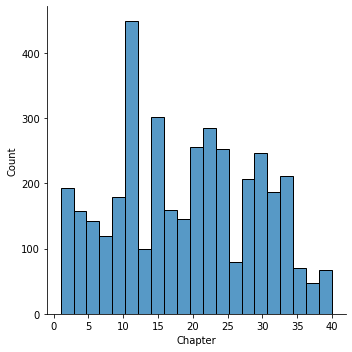

In [66]:
sns.displot(rashi['Chapter'])

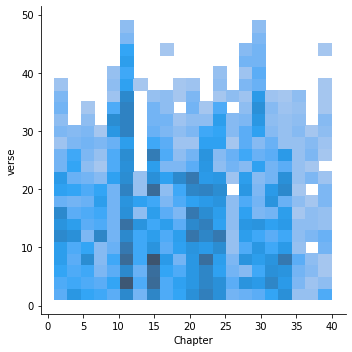

In [60]:
sns.displot(data=rashi, x='Chapter', y='verse')

In [76]:
rashi_ch_select = rashi[(rashi['Chapter'] >= 9) & (rashi['Chapter'] <= 22)]

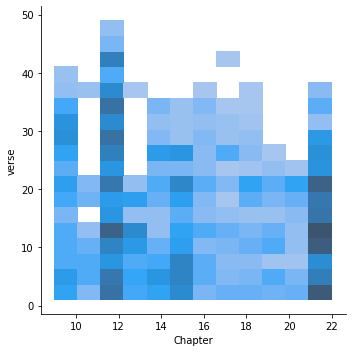

In [77]:
sns.displot(data=rashi_ch_select, x='Chapter', y='verse')